# Color quantization

_Just a little test to try K-Means for color quantization._

In [1]:
# Imports

import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [2]:
# Let's first open a image as an array. 
image_as_array = mpimg.imread('data/palm_trees.jpg')

# rgb codes for each pixel
image_as_array

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 115],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

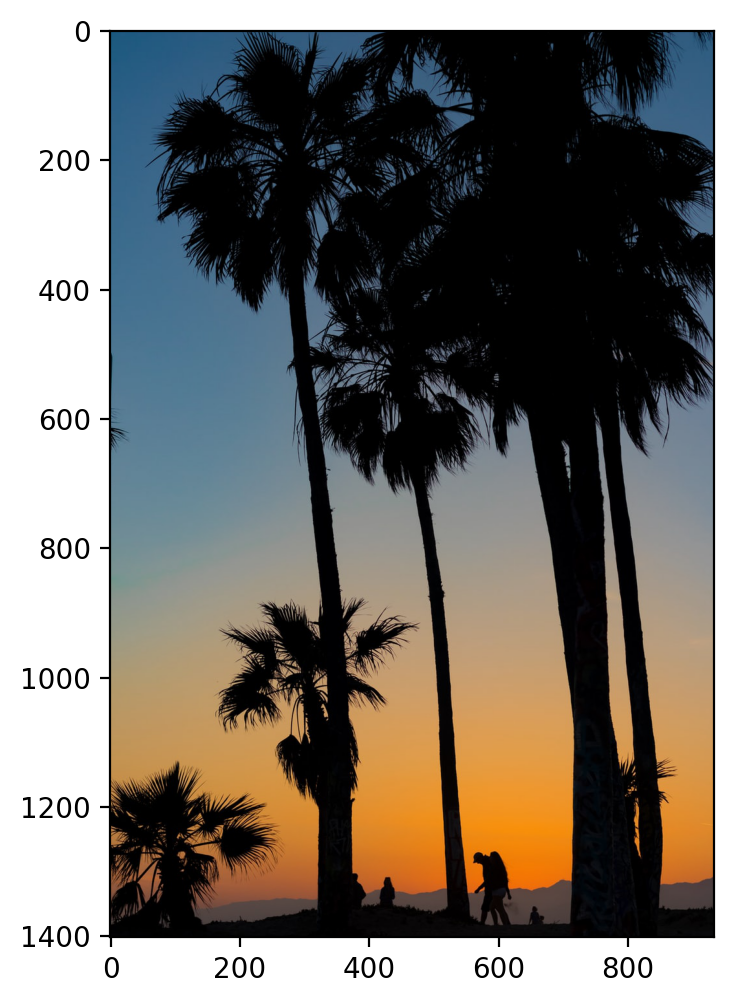

In [3]:
# This is the image
plt.figure(figsize=(6,6), dpi=200)
plt.imshow(image_as_array)

### Using Kmeans to Quantize Colors

"Quantize colors" means that we will reduce the number of unique colors to K colors.

In [4]:
# This is the shape of the image/array we have
image_as_array.shape

# height, width, 3 colors(rgb)

(1401, 934, 3)

In [5]:
# We need to transform from 3d to 2d, since K means works for 2d data (data rows and columns/features)

(h, w, c) = image_as_array.shape
image_as_array_2d = image_as_array.reshape(h*w, c)

In [6]:
# Creation of the model, fit of the data and predict of the labels to each point/pixel
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=10)
labels = kmeans_model.fit_predict(image_as_array_2d)
labels

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [7]:
# These are the 10 rgb color codes // centers of the clusters -> colors of the image
kmeans_model.cluster_centers_

array([[177.11899006, 154.79213047, 125.97769218],
       [  1.94483553,   1.6793001 ,   2.64107299],
       [ 56.07362156,  97.40787277, 130.27529759],
       [139.00932846, 144.98312528, 145.06073135],
       [208.63670792, 153.77607091,  87.72945751],
       [ 71.4999578 ,  66.50759558,  68.05264157],
       [ 29.284215  ,  31.64017186,  37.02606964],
       [ 93.04198691, 125.07527276, 146.15443541],
       [157.1446119 ,  98.57634652,  57.83268011],
       [228.82678436, 135.61871706,  35.75673823]])

In [8]:
# to rgb codes
rgb_codes = kmeans_model.cluster_centers_.round(0).astype(int)
rgb_codes

array([[177, 155, 126],
       [  2,   2,   3],
       [ 56,  97, 130],
       [139, 145, 145],
       [209, 154,  88],
       [ 71,  67,  68],
       [ 29,  32,  37],
       [ 93, 125, 146],
       [157,  99,  58],
       [229, 136,  36]])

In [9]:
quantized_image = np.reshape(rgb_codes[labels], (h, w, c))

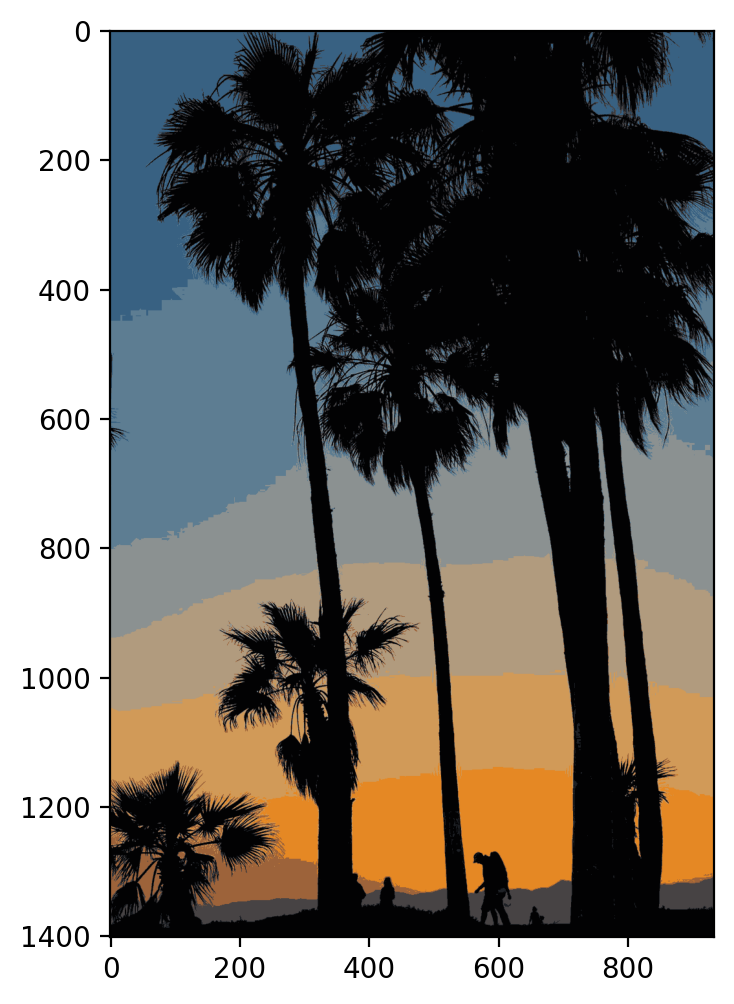

In [10]:
plt.figure(figsize=(6,6), dpi=200)
plt.imshow(quantized_image)